# Data import and exploration
New pulsemaker files

## First, look at the data
id, samples, amplitude1, rise1, decay1, position1, offset, amplitude2, rise2, decay2, position2, val1, val2, ...
The id is either 1 for a single pulse or 2 for a double pulse. In the single pulse case all the pulse parameters for the second pulse are 0.

Open up the file and look at it. In most linux terminals you can also use the command
`head` to display a set number of lines from the start of the file. We'll start with the first line.
Usually you will also have some information about the file formatting.
You can run shell commands inside the notebook by starting the line with an exclamation mark.

In [1]:
!head -1 ../data/training_pm_nosat.dat

2 200 5136.03 1.0296 0.0632989 66.9923 4149.64 7005.41 0.857476 0.0588335 118.266 4153.79 4170.68 4145.8 4154.74 4152.24 4141.47 4173.34 4129.62 4141.8 4158.7 4135.79 4140.04 4128.11 4131.23 4156.82 4128.57 4166.02 4144.55 4141.52 4133.13 4134.21 4160.63 4161.76 4126.27 4148.89 4136.9 4130.08 4146.22 4130.12 4156.7 4130.18 4155.1 4157.67 4160.9 4160.27 4168.4 4142.69 4158.21 4172.39 4143.67 4152.19 4137.76 4158.18 4167.28 4169.64 4139.98 4157.75 4145.74 4144.62 4157.48 4149.83 4154.54 4149.57 4163.6 4157.64 4145.49 4142.95 4127.74 4168.53 4166.8 4170 4165.18 4208.21 4281.28 4436.98 4805.44 5595.11 6724.02 7696.29 8174.7 8236.56 8065.03 7876.59 7659.38 7421.87 7259.16 7069.88 6851.5 6715.6 6563.89 6396.11 6277.59 6144.92 5990.1 5898.83 5796.82 5709.69 5580.24 5515.84 5439.1 5344.56 5286 5219.46 5130.83 5056.62 5002.6 4956.97 4920.22 4854.81 4832.45 4803.12 4722.64 4718.78 4660.3 4620.71 4596.74 4601.24 4553.26 4531.14 4535.63 4493.12 4481.53 4488.13 4535.71 4661.52 4873.28 5370.02 6273.

## Data import
This is a bit of a "hands-on" approach that focuses on using base functions in python and
Numpy to read the file and create some arrays we can work with.
Reading the file is pretty straightforward, but some challenges appear when the file is large.
We will prepare for that scenario from the get-go.

training_pm_nosat.dat contains 1M mixed single and double events.\
We set a datapath and filename. Note that we use the 'relative' path to our data, from the
location of the notebook. This works well in a github repo where you control the folder structure.
And if someone else will clone or fork the repo, they don't need to replace the paths.

For small datafiles you can read the entire file into memory, store it as a list where each element is a line in the file, and work from there.
```python
with open(DATA_PATH + fname, "r") as datafile:
    data = datafile.readlines()
```
You now have a list `data` containing all the lines in the file. Using the `with` statement is a shortcut so
we don't need to manually close the file after opening it.
However, reading the entire file into memory might not be possible, so we will read it line by line instead,
looping over the file. This read only one line into memory at a time.

Some resources for this exercise
* [Python I/O File handling](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
* [Numpy array indexing](https://numpy.org/doc/1.18/reference/arrays.indexing.html)
* [Numpy's fromstring() function](https://numpy.org/doc/1.18/reference/generated/numpy.fromstring.html)

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Set path to data and filename. You can also store it a single variable
# DATA_PATH = "../data/CeBr10k_1.txt" if you prefer. Here we expect to use at least the path itself later,
# so we separate them.
DATA_PATH = "../data/"
fname = "training_pm_nosat.dat"

# Number of lines to import
num_lines = 10

In [9]:
# Lists to store each image, energy, position, and labels. We know the filesize, so we could create
# arrays that perfectly match the data, but let's assume we don't know how many lines we're going to
# read. 
labels = []
amplitudes = []
rises = []
decays = []
positions = []
offsets = []
samples = []

# Open the file
with open(DATA_PATH + fname, "r") as datafile:
    # Loop over the file, line by line
    linecount = 0
    for line in datafile:
        if linecount >= num_lines:
            break
        # The line is still a string when read from the file. We use numpys fromstring()
        # to convert the line to a numpy array, specifying that each element is separated
        # by a space. This does not convert the line in the file, only the "copy" that we have
        # read into memory. fromstring() also removes any trailing newline ('\n') characters
        # so we don't have to worry about that. The values will be interpreted as floats.
        line = np.fromstring(line, sep=' ')
        
        # id, samples, amplitude1, rise1, decay1, position1, offset, amplitude2, rise2, decay2, position2, val1, val2,
        # First we grab the known variables for the data, and set labels to 0 / 1 for single / double
        label = 0 if line[0] == 1 else 1
        amplitude = np.array((line[2], line[7]))
        rise = np.array((line[3], line[8]))
        decay = np.array((line[4], line[9]))
        pos = np.array((line[5], line[10]))
        offset = line[6]
        
        # Grab the sample values, located at index 11 to the end of the line
        sample = np.array(line[11:])

        # Finally, we take the separated arrays and add them to their respective "storage" lists.
        labels.append(label)
        amplitudes.append(amplitude)
        rises.append(rise)
        decays.append(decay)
        positions.append(pos)
        offsets.append(offset)
        samples.append(sample)
        
        linecount += 1

        
# We've now looped over the entire file. The only thing that remains is to convert the lists
# to numpy arrays.
labels = np.array(labels)
amplitudes = np.array(amplitudes)
rises = np.array(rises)
decays = np.array(decays)
positions = np.array(positions)
offsets = np.array(offsets)
samples = np.array(samples)

In [12]:
# We print the shape of the arrays we've made as a quick check using
# the shape property of numpy arrays.
print("Labels shape, dtype:", labels.shape, labels.dtype)
print("Amplitues shape:", amplitudes.shape, amplitudes.dtype)
print("Rises shape:", rises.shape, rises.dtype)
print("Decays shape:", decays.shape, decays.dtype)
print("Positions shape:", positions.shape, positions.dtype)
print("Offsets shape:", offsets.shape, offsets.dtype)
print("Samples shape:", samples.shape, samples.dtype)


Labels shape, dtype: (10,) int64
Amplitues shape: (10, 2) float64
Rises shape: (10, 2) float64
Decays shape: (10, 2) float64
Positions shape: (10, 2) float64
Offsets shape: (10,) float64
Samples shape: (10, 200) float64


The output above tells us that we've got 10000 images, each of length 256, as well as two energy values for each image, and four positions. The images, energies, and positions arrays have two dimensions, while the labels array
only has one.

## Inspection of imported data
Let's plot a single and a double event to see what we're working with.
We can extract the indices of singles and double using the labels array, and a numpy
function called np.where.

Resources:
* [Matplotlib tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* [Numpy np.where() doc](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [18]:
# np.where returns a tuple where the first (and in this case only) element is our indices
singles = np.where(labels == 0)[0]
doubles = np.where(labels == 1)[0]
print("Num imported single events: ", singles.shape)
print("Num imported double events: ", doubles.shape)

Num imported single events:  (1,)
Num imported double events:  (9,)


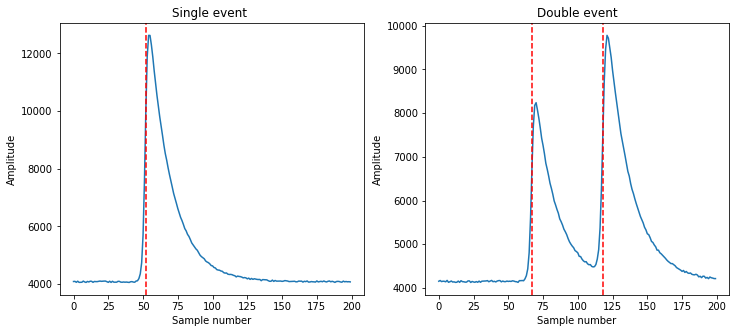

============ Single event info
Amplitude: [10801.     0.]
Rise: [1.03706 0.     ]
Decay: [0.0621728 0.       ]
Positions: [51.7892  0.    ]
Offset: 4082.57
============ Double event info
Amplitude: [5136.03 7005.41]
Rise: [1.0296   0.857476]
Decay: [0.0632989 0.0588335]
Positions: [ 66.9923 118.266 ]
Offset: 4149.64


In [46]:
# We can now grab a single and a double event by using the index arrays we made
# Ex. to get the sample values for the first single event: samples[singles[0]]

# Plot a single and double event side by side
# Add red dotted lines for where the positions are.
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(samples[singles[0]])
ax[0].axvline(positions[singles[0], 0], color='r', linestyle='--')
ax[0].set_title("Single event ")
ax[0].set_xlabel("Sample number")
ax[0].set_ylabel("Amplitude")

ax[1].plot(samples[doubles[0]])
ax[1].axvline(positions[doubles[0], 0], color='r', linestyle='--')
ax[1].axvline(positions[doubles[0], 1], color='r', linestyle='--')
ax[1].set_title("Double event")
ax[1].set_xlabel("Sample number")
ax[1].set_ylabel("Amplitude")
plt.show()

# Print the additional information we have about the events.
print("============ Single event info")
print("Amplitude:", amplitudes[singles[0]])
print("Rise:", rises[singles[0]])
print("Decay:", decays[singles[0]])
print("Positions:", positions[singles[0]])
print("Offset:", offsets[singles[0]])

print("============ Double event info")
print("Amplitude:", amplitudes[doubles[0]])
print("Rise:", rises[doubles[0]])
print("Decay:", decays[doubles[0]])
print("Positions:", positions[doubles[0]])
print("Offset:", offsets[doubles[0]])

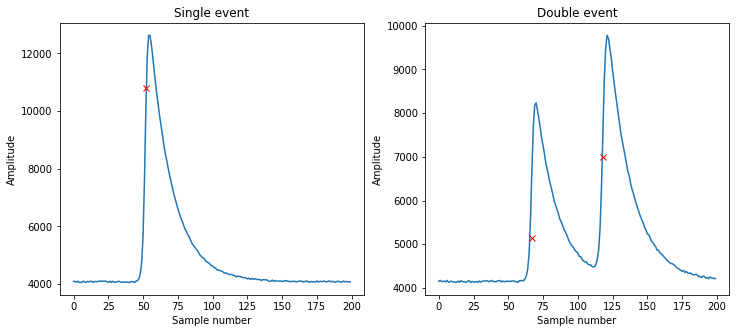

In [70]:
# Plotting with annotations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(samples[singles[0]])
ax[0].plot(positions[singles[0], 0], amplitudes[singles[0], 0], 'rx')
ax[0].set_title("Single event")
ax[0].set_xlabel("Sample number")
ax[0].set_ylabel("Amplitude")

ax[1].plot(samples[doubles[0]])
ax[1].plot(positions[doubles[0], 0], amplitudes[doubles[0], 0], 'rx')
ax[1].plot(positions[doubles[0], 1], amplitudes[doubles[0], 1], 'rx')
ax[1].set_title("Double event")
ax[1].set_xlabel("Sample number")
ax[1].set_ylabel("Amplitude")
plt.show()

## Separate and save the data
First, we separate the data into a *training set* and a *test set*. The test set will be used to give us an "out-of-sample"
accuracy. To do this properly, the model will never see the test set in any way, shape, or form before we've trained, evaluated, and optimized it as far as we'd like to go. In other words, we use the training set to make the model as good as possible, and only then do we predict on the test set and report out-of-sample metrics.

You can do the splitting of data manually by slicing the arrays, but scikit-learn has it's own function for doing this,
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split).
Instead of creating copies of the dataset, filling up often precious memory, we will work with indices that we
pass around. This also makes it easier to trace any results back to the original inputs.

### Numpy format

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Indices for all data
x_idx = np.arange(images.shape[0])

# Split the indices into training and test sets (take out 10% of the data as test)
train_idx, test_idx, not_used1, not_used2 = train_test_split(x_idx, x_idx, test_size = 0.1)

# Save the training and test data in the data folder
# We also need to save the labels, energies, and positions. This allows us to
# quickly load it if we need it.

# Save the training data. np.save adds a ".npy" file extension to the provided filename.
# We save the files in the same folder as the original datafile.
np.save(DATA_PATH + "images_training", images[train_idx])
np.save(DATA_PATH + "energies_training", energies[train_idx])
np.save(DATA_PATH + "positions_training", positions[train_idx])
np.save(DATA_PATH + "labels_training", labels[train_idx])

# Save the test data
np.save(DATA_PATH + "images_test", images[test_idx])
np.save(DATA_PATH + "energies_test", energies[test_idx])
np.save(DATA_PATH + "positions_test", positions[test_idx])
np.save(DATA_PATH + "labels_test", labels[test_idx])

You could also opt to store the entire training and test sets as two files, by concatenating them.
This is just personal preference.

### hdf5 format

In [20]:
import h5py

In [21]:
# Open separate files for saving training and test datasets
data_training = h5py.File(DATA_PATH + "data_training.hdf5", "w")
data_test = h5py.File(DATA_PATH + "data_test.hdf5", "w")

# Training data
data_training.create_dataset('images', data=images[train_idx])
data_training.create_dataset('energies', data=energies[train_idx])
data_training.create_dataset('positions', data=positions[train_idx])
data_training.create_dataset('labels', data=labels[train_idx])
data_training.close()

# Test data
data_test.create_dataset('images', data=images[test_idx])
data_test.create_dataset('energies', data=energies[test_idx])
data_test.create_dataset('positions', data=positions[test_idx])
data_test.create_dataset('labels', data=labels[test_idx])
data_test.close()